<a href="https://colab.research.google.com/github/yuktapal/ai_and_ml_ybi/blob/main/bigsale_prediction_ybi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIG SALE PREDICTION USING RANDOM FOREST REGRESSOR


 **GETTING UNDERSTANDING ABOUT DATA SET**

ProductID : unique product ID

Weight : weight of products

FatContent : specifies whether the product is low on fat or not

Visibility : percentage of total display area of all products in a store allocated to the particular product

ProductType : the category to which the product belongs

MRP : Maximum Retail Price (listed price) of the products

OutletID : unique store ID

EstablishmentYear : year of establishment of the outlets

OutletSize : the size of the store in terms of ground area covered

LocationType : the type of city in which the store is located

OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket

OutletSales : (target variable) sales of the product in the particular store









**Import library**

In [1]:
import pandas as pd
import numpy as np

Import CSV as Dataframe


In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

Get the first five row

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [50]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int64  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.3 MB


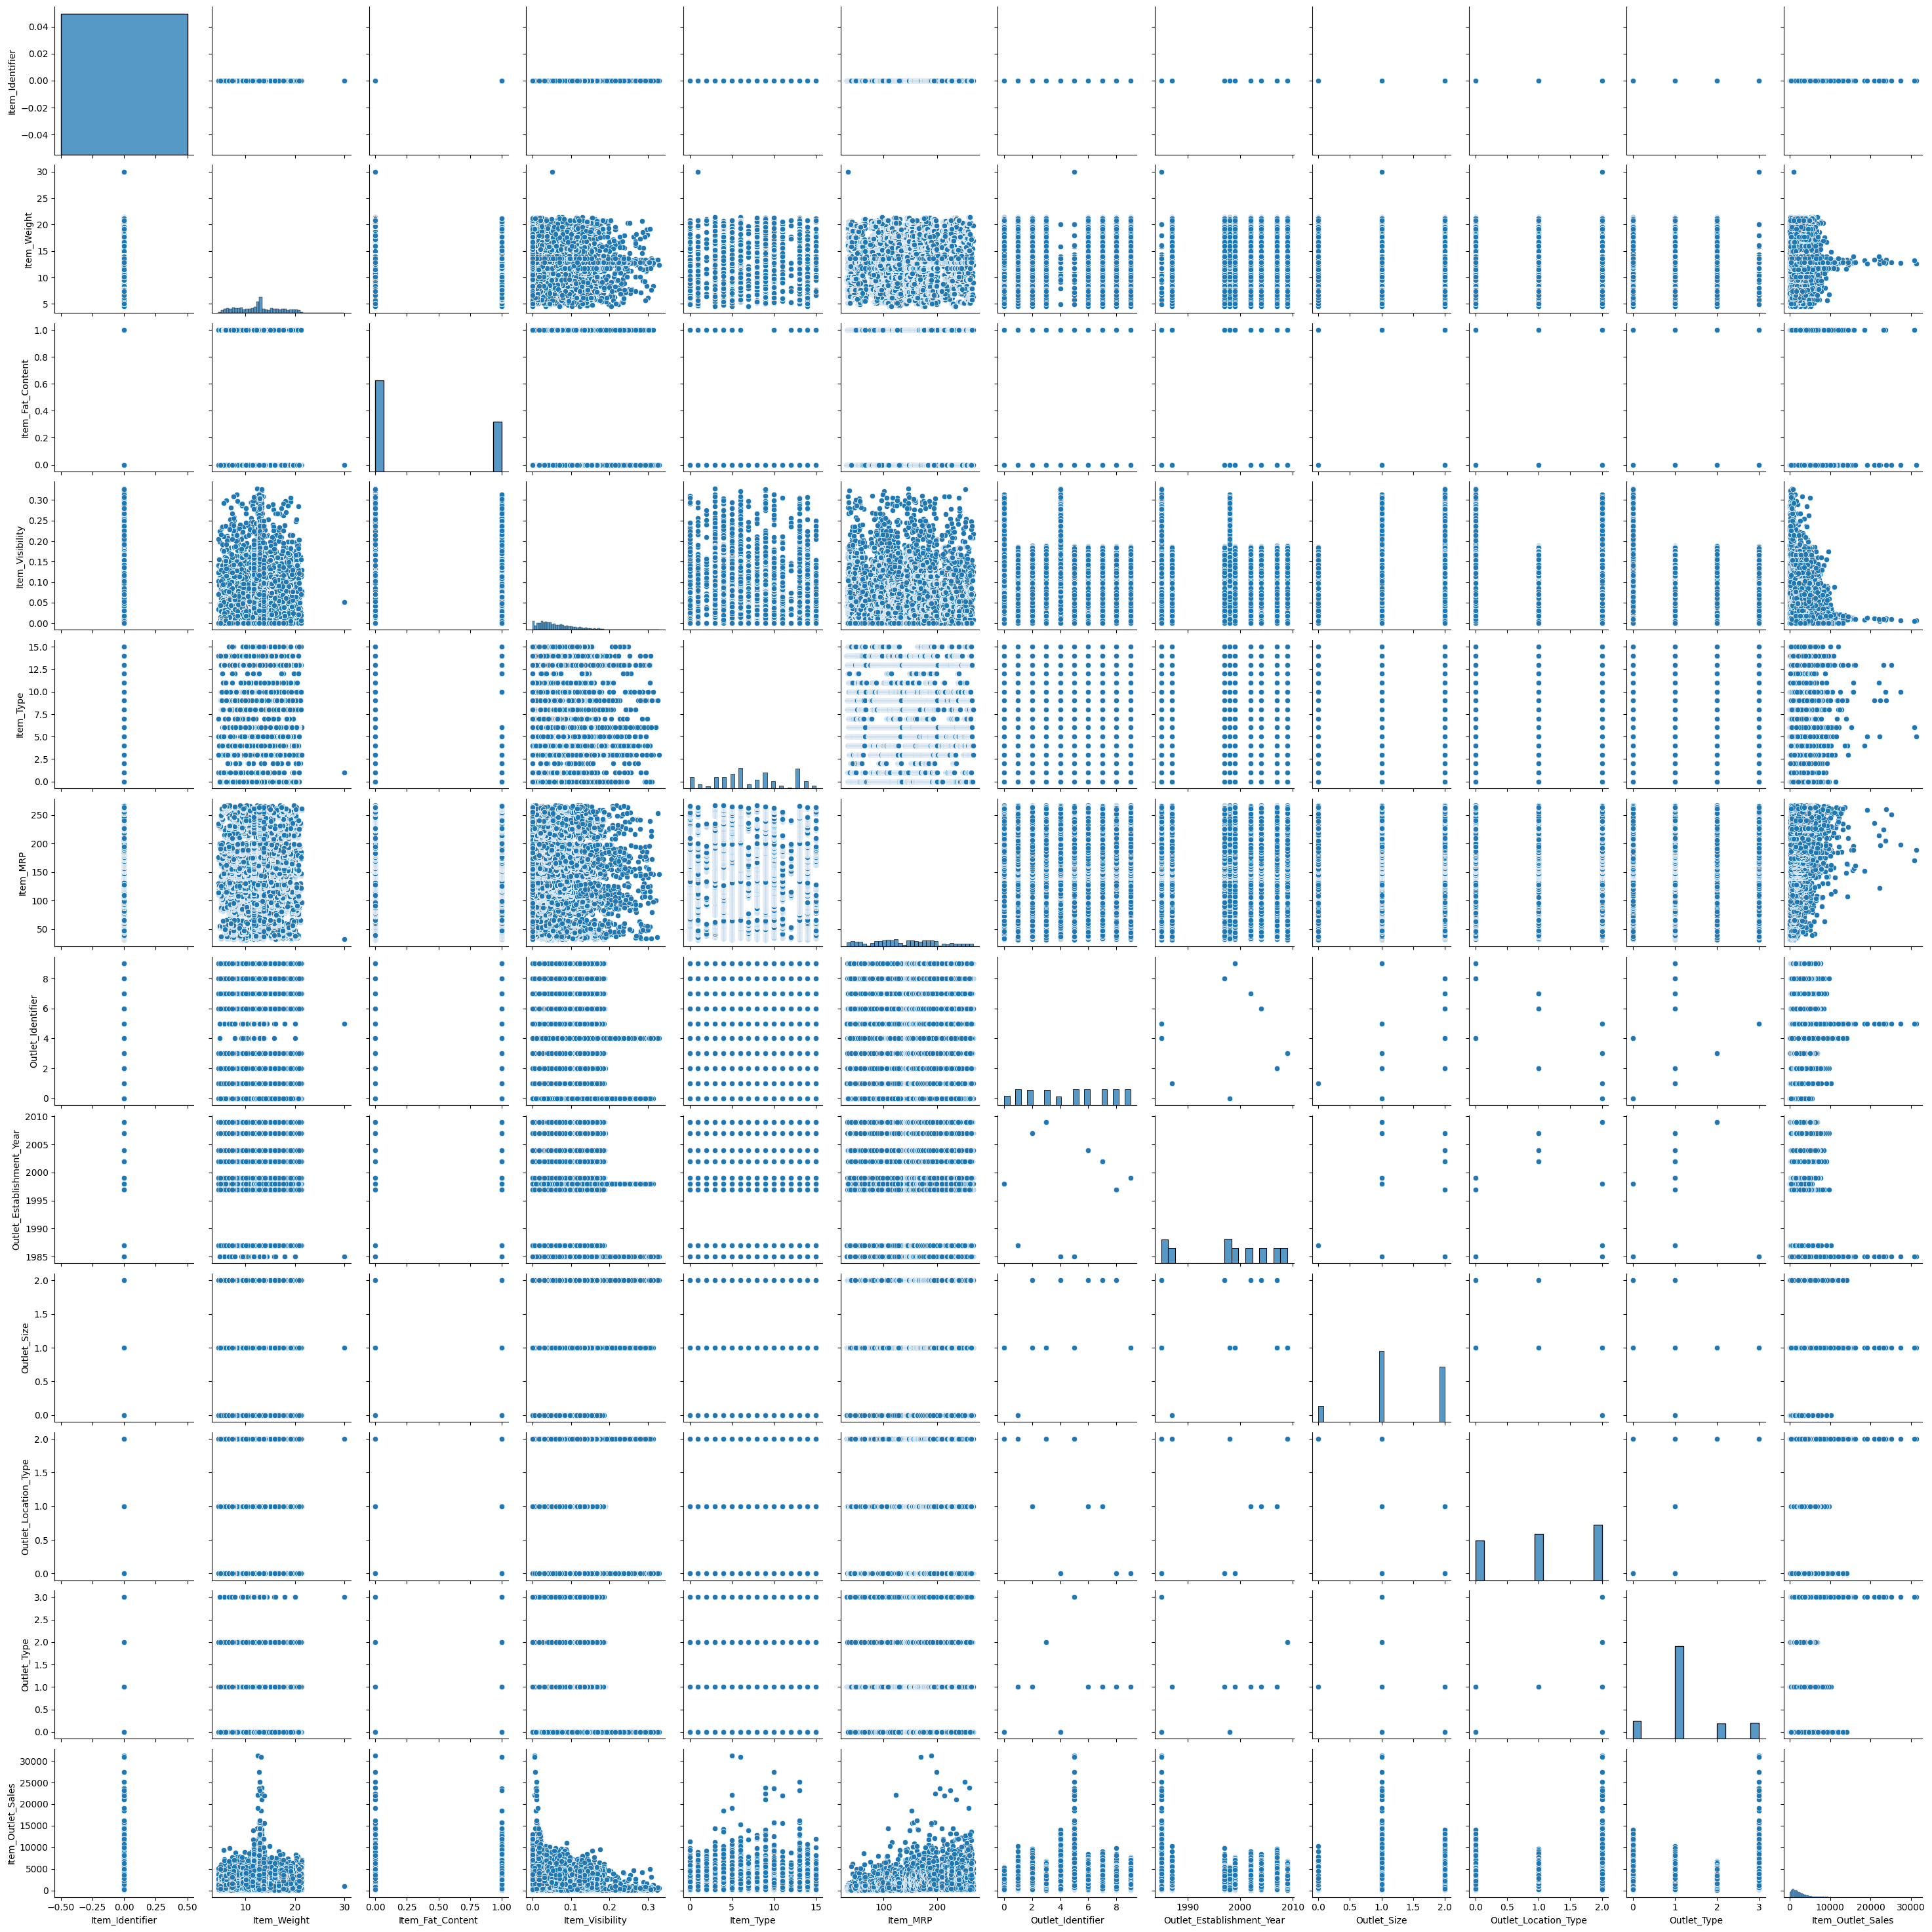

In [52]:
import seaborn as sns
sns.pairplot(df)

Get catogories and counts of categorical variable

In [55]:
df[['Item_Identifier']].value_counts()

Item_Identifier
0                  14204
dtype: int64

In [56]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [14]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}}, inplace=True)

In [57]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [58]:
df[['Item_Type']].value_counts()

Item_Type
6            2013
13           1989
9            1548
5            1426
4            1136
0            1086
3            1084
8             858
10            736
14            726
1             416
7             362
11            280
15            269
2             186
12             89
dtype: int64

Converting categorical columns into numeric values

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder=LabelEncoder()

In [61]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])

In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,0,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,0,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,0,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,0,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


Define Y (dependent variable ) and X (independent variable)

In [63]:
y=df['Item_Outlet_Sales']

In [64]:
y.shape

(14204,)

In [65]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [66]:
x=df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)

In [67]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,9,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,2,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,3,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,4,1985,2,0,0
4,9.800000,1,0.045523,0,35.0874,2,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,15,261.9252,6,2004,2,1,1
14200,12.800000,0,0.070013,15,262.8252,2,2007,1,1,1
14201,12.800000,0,0.069561,15,263.0252,1,1987,0,2,1
14202,13.659758,0,0.069282,15,263.5252,5,1985,1,2,3


Get x variable Standarize

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc=StandardScaler()

In [70]:
x_std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [71]:
x_std=sc.fit_transform(x_std)

In [72]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [73]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(x_std,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [74]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,9,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,2,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,3,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,4,-1.532686,2,0,0
4,-0.703509,1,-0.397031,0,-1.706016,2,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,15,1.947664,6,0.736955,2,1,1
14200,0.002201,0,0.078898,15,1.962160,2,1.095319,1,1,1
14201,0.002201,0,0.070120,15,1.965381,1,-1.293777,0,2,1
14202,0.204448,0,0.064694,15,1.973435,5,-1.532686,1,2,3


Get Train Test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2529)

In [77]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

Get model train

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rfr=RandomForestRegressor(random_state=2529)

In [80]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

Get model predicition

In [81]:
y_pred=rfr.predict(x_test)

In [82]:
y_pred.shape

(1421,)

In [83]:
y_pred

array([1346.29625744,  664.92166332, 1930.89023885, ..., 2285.27996825,
       3221.35115921,  481.05557505])

Get model evalution

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [87]:
mean_absolute_error(y_test,y_pred)

838.6878912933828

In [88]:
mean_squared_error(y_test,y_pred)

1678597.1609827501

In [89]:
r2_score(y_test,y_pred)

0.56308608154534

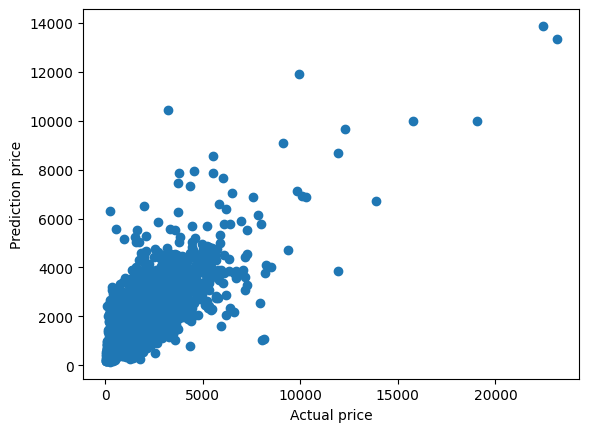

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual price")
plt.ylabel("Prediction price")
plt.show()